In [3]:
import pandas as pd


file_path = '/Users/maedehrahimitouranposhti/Downloads/research/new_intermodal_data-2 (2).csv'  # replace with your actual file path
data = pd.read_csv(file_path)

# Filter the rows where the 'mode' column is 'Rail'
filtered_data = data[data['dms_mode'] == 'Rail']


output_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonly.csv'  # replace with your desired output file path
filtered_data.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")


Filtered data saved to /Users/maedehrahimitouranposhti/Downloads/research/railonly.csv


In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from __future__ import division
import csv
import math
import powerlaw
from numpy import genfromtxt
import random
import pandas as pd

In [5]:
import pandas as pd


railonly_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonly.csv'
data = pd.read_csv(railonly_file_path)


filtered_data = data[data['dms_mode'] == 'Rail']

# Prepare the edges data
edges = filtered_data[['dms_orig_string', 'dms_dest_string', 'distance_miles']].copy()
edges['Id'] = range(1, len(edges) + 1)

# Prepare the nodes data
nodes = pd.concat([filtered_data[['dms_orig_string']], filtered_data[['dms_dest_string']]], ignore_index=True)
nodes = nodes.drop_duplicates().reset_index(drop=True)


edges_output_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonlyedges.csv'
nodes_output_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonlynodes.csv'
edges.to_csv(edges_output_file_path, index=False)
nodes.to_csv(nodes_output_file_path, index=False)

print(f"Edges data saved to {edges_output_file_path}")
print(f"Nodes data saved to {nodes_output_file_path}")

Edges data saved to /Users/maedehrahimitouranposhti/Downloads/research/railonlyedges.csv
Nodes data saved to /Users/maedehrahimitouranposhti/Downloads/research/railonlynodes.csv


In [6]:
pip install pandas networkx matplotlib powerlaw

Note: you may need to restart the kernel to use updated packages.


Calculating best minimal value for power law fit


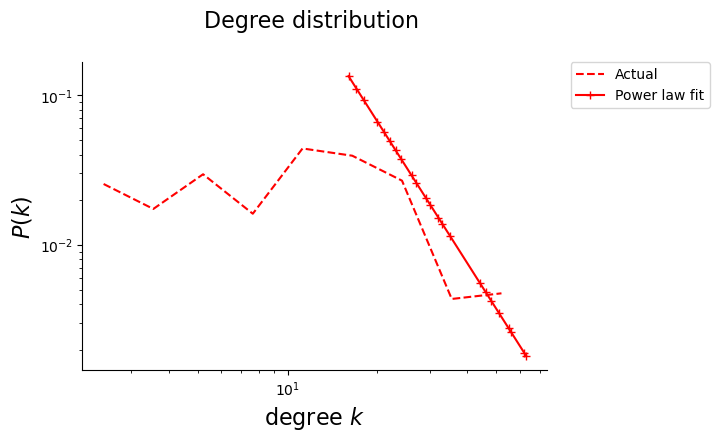

In [7]:

edges_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonlyedges.csv'  # Replace with the path to your filtered edges file
edges = pd.read_csv(edges_file_path)

# NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

#Compute the degree distribution
degrees1 = [d for n, d in G.degree()]
kmin = min(degrees1)
kmax = max(degrees1)

# Fit the degree distribution to a power law
fit1 = powerlaw.Fit(degrees1)
gamma1 = fit1.power_law.alpha

# Calculate the histogram for the degree distribution
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)


fig1 = plt.figure(figsize=(6, 4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1]) / 2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fit1.power_law.plot_pdf(ax=ax, label='Power law fit', color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n', fontsize=16)
plt.show()


In [8]:
pip install pandas networkx

Note: you may need to restart the kernel to use updated packages.


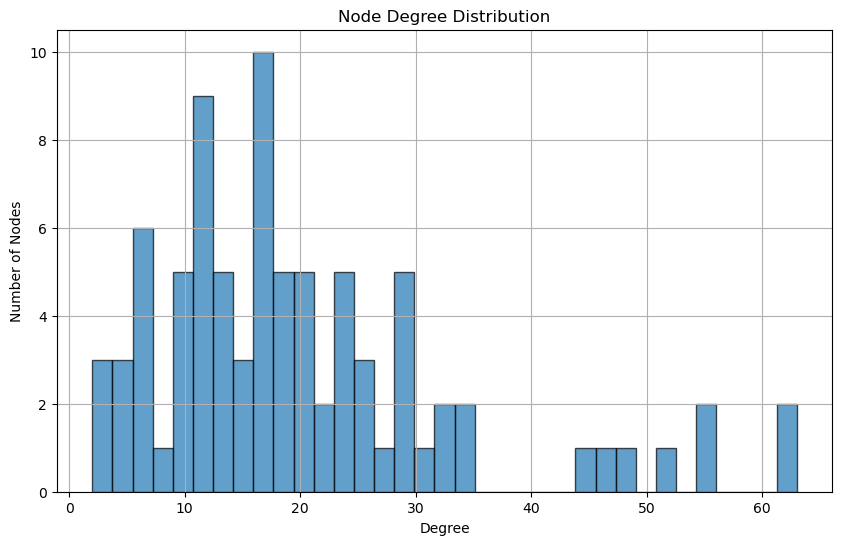

In [10]:

edges_file_path = '/Users/maedehrahimitouranposhti/Downloads/research/railonlyedges.csv'  # Replace with the path to your filtered edges file
edges = pd.read_csv(edges_file_path)

# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Calculate the degrees of each node
node_degrees = dict(G.degree())

# Prepare the nodes data
orig_nodes = edges[['dms_orig_string']].rename(columns={'dms_orig_string': 'Node'})
dest_nodes = edges[['dms_dest_string']].rename(columns={'dms_dest_string': 'Node'})
nodes = pd.concat([orig_nodes, dest_nodes], ignore_index=True).drop_duplicates().reset_index(drop=True)

# Add degree information to nodes
degree_airport = nodes['Node'].map(node_degrees).fillna(0)
degree_airport_t = np.array(degree_airport).reshape(-1, 1)

# Prepare the update array
nodes_t = np.array(nodes).reshape(-1, 1)
update = np.hstack((nodes_t, degree_airport_t))


df = pd.DataFrame(update, columns=['Node', 'Degree'])


save = 'yes'
if save == 'yes':
    df.to_csv('update.csv', header=True, index=False, sep=',')

# Plot the node degrees
plt.figure(figsize=(10, 6))
plt.hist(degree_airport, bins=35, edgecolor='black', alpha=0.7)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Node Degree Distribution')
plt.grid(True)
plt.show()


In [11]:
#average degree
averagedegree=G.size()*2/len(G)
print ("average degree: ",averagedegree)
#G.nodes()

average degree:  20.19047619047619


In [12]:
#average clustering
cluster1=nx.average_clustering(G)
print ("average clustering coeff: ", cluster1)

average clustering coeff:  0.5318624303119969


In [13]:
#diameter of the Graph
diameter=nx.diameter(G)
print ("diameter of the graph :",diameter )

diameter of the graph : 4


In [14]:
#average shortest path length
path_len_av=nx.average_shortest_path_length(G)
print ("average shortest path length: ", path_len_av)

average shortest path length:  1.8519793459552496


In [15]:
#degrees robustness
def degree_robust(C):
    C=G.copy()
    Gc_d=[]
    for i in range(0,len(C)):
        deg=pd.Series(C.degree())
        gc = max(nx.connected_component_subgraphs(C), key=len)
        Gc_d.append(len(gc))
        #removal
        deg.sort(ascending=False)
        target=deg.index[0] #this is the index of the node that has to be removed
        C.remove_node(target)
    return Gc_d

In [16]:
#degrees robustness
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(0, len(G)):
        node_deg = list(G.degree().items())
        gc = max(nx.connected_component_subgraphs(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

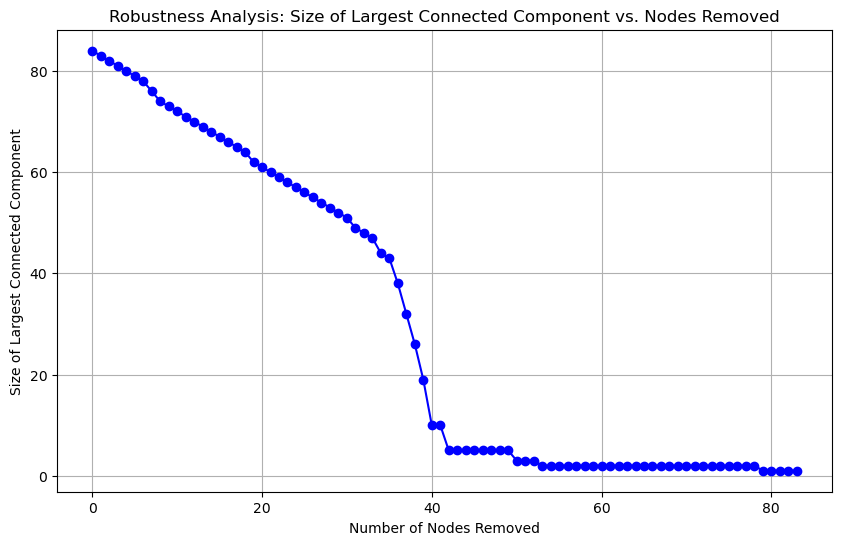

In [18]:
# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)

print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)


plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.grid(True)
plt.show()

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

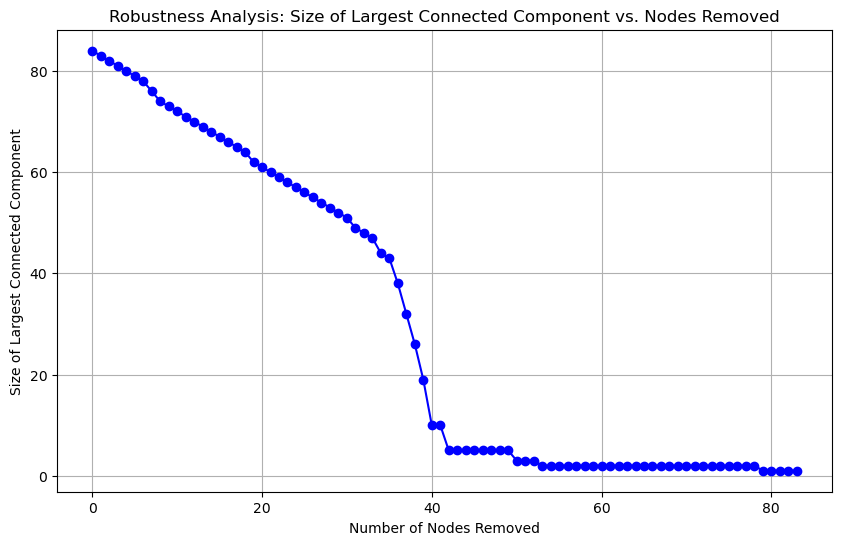

Random removal robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 33, 31, 30, 29, 28, 27, 26, 25, 24, 23, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 6, 5, 4, 3, 2, 1, 1]


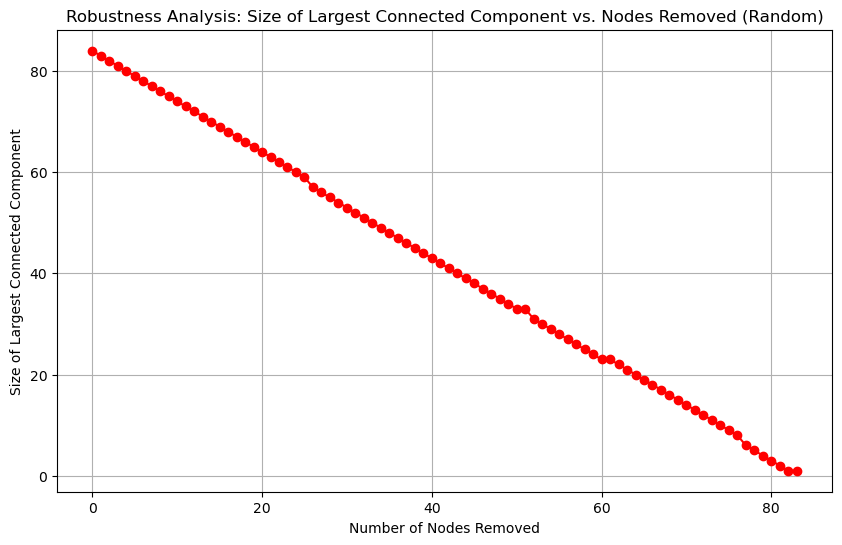

In [19]:
# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)

print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.grid(True)
plt.show()

# Random removal robustness function
def degree_robust_rand(G):
    G = G.copy()
    Gc_dr = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_dr.append(len(gc))
        # Random removal
        target = random.choice(list(G.nodes()))
        G.remove_node(target)
    return Gc_dr

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)

print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Plot the robustness analysis for random attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_dr, marker='o', linestyle='-', color='r')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed (Random)')
plt.grid(True)
plt.show()


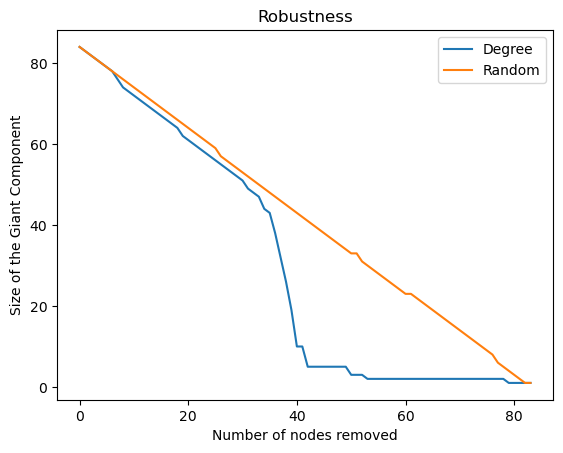

In [20]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, label="Degree") 
plt.plot(Gc_dr, label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness") 
plt.legend()

In [22]:
#degree preserving ramdomization
G_pre=G.copy()
G_preserving=nx.double_edge_swap(G_pre, nswap=1, max_tries=100)

In [24]:
#doing robustness analysis for degree preserving randomizations
Gc_pre=degree_robust(G_preserving)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

NameError: name 'Gc_pre' is not defined

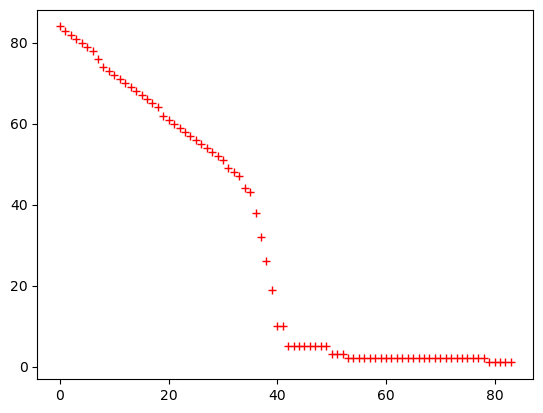

In [25]:
#ploting the robustness graph for targeted  and random attack based on degree
plt.plot(Gc_d, 'r+', label="Actual") 
plt.plot(Gc_pre, 'b--', label="Random") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for a rail Network-Degree preserving randomization") 
plt.legend()

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

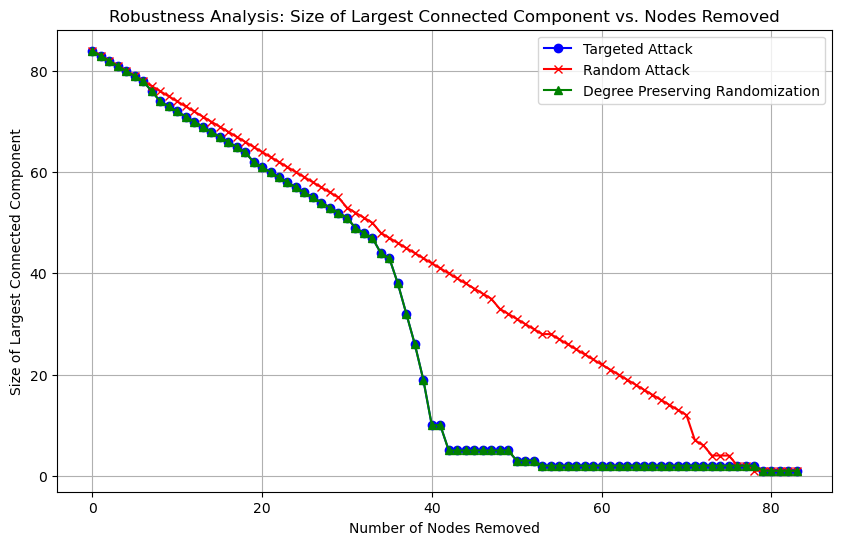

In [26]:
# Construct the graph using NetworkX
G = nx.Graph()
edges_array = edges[['dms_orig_string', 'dms_dest_string', 'distance_miles']].values
G.add_weighted_edges_from(edges_array)

# Degree robustness function
def degree_robust_remove(G):
    G = G.copy()
    Gc_d = []
    removed = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_d.append(len(gc))
        target = max(node_deg, key=lambda x: x[1])[0]
        G.remove_node(target)
        removed.append(target)
    return Gc_d, removed

# Random removal robustness function
def degree_robust_rand(G):
    G = G.copy()
    Gc_dr = []
    for i in range(len(G)):
        node_deg = list(G.degree())
        if not node_deg:
            break
        gc = max(nx.connected_components(G), key=len)
        Gc_dr.append(len(gc))
        # Random removal
        target = random.choice(list(G.nodes()))
        G.remove_node(target)
    return Gc_dr

# Degree preserving randomization and robustness analysis
def degree_preserving_randomization_robustness(G):
    G_pre = G.copy()
    G_preserving = nx.double_edge_swap(G_pre, nswap=1, max_tries=100)
    Gc_pre, _ = degree_robust_remove(G_preserving)
    return Gc_pre

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)
print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)
print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Execute degree preserving randomization robustness analysis
Gc_pre = degree_preserving_randomization_robustness(G)
print("Degree preserving randomization robustness (size of largest connected component after each removal):", Gc_pre)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b', label='Targeted Attack')
plt.plot(Gc_dr, marker='x', linestyle='-', color='r', label='Random Attack')
plt.plot(Gc_pre, marker='^', linestyle='-', color='g', label='Degree Preserving Randomization')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#generating GNM graph
G_gnm_c=G.copy()
G_gnm=nx.gnm_random_graph(len(G_gnm_c), G.number_of_edges(), seed=23, directed=False)
averagedegree_gnm=G_gnm.size()*2/len(G_gnm)
print ("average degree of GNM :", averagedegree_gnm)

average degree of GNM : 20.19047619047619


In [29]:
G_gnm1=G_gnm.copy()
Gc_gnm_d=degree_robust(G_gnm1)

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

Degree robustness (size of largest connected component after each removal): [84, 83, 82, 81, 80, 79, 78, 76, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 49, 48, 47, 44, 43, 38, 32, 26, 19, 10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
Nodes removed in order: ['Houston TX', 'Iowa', 'Chicago IL-IN-WI (IL Part)', 'Los Angeles CA', 'Baton Rouge LA', 'New Orleans LA-MS (LA Part)', 'Wyoming', 'Atlanta GA', 'Detroit MI', 'Fort Wayne IN', 'Cleveland OH', 'Minneapolis-St. Paul MN-WI (MN Part)', 'Beaumont TX', 'San Francisco CA', 'Philadelphia PA-NJ-DE-MD (PA Part)', 'Portland OR-WA (OR Part)', 'Tampa FL', 'Philadelphia PA-NJ-DE-MD (NJ Part)', 'Indianapolis IN', 'Baltimore MD', 'Salt Lake City UT', 'Chicago IL-IN-WI (IN Part)', 'Columbus OH', 'Birmingham AL', 'New York NY-NJ-CT-PA (NY Part)', 'Charleston SC', 'Memphis TN-MS-AR (TN Part)', 'New York NY-NJ-CT-PA (

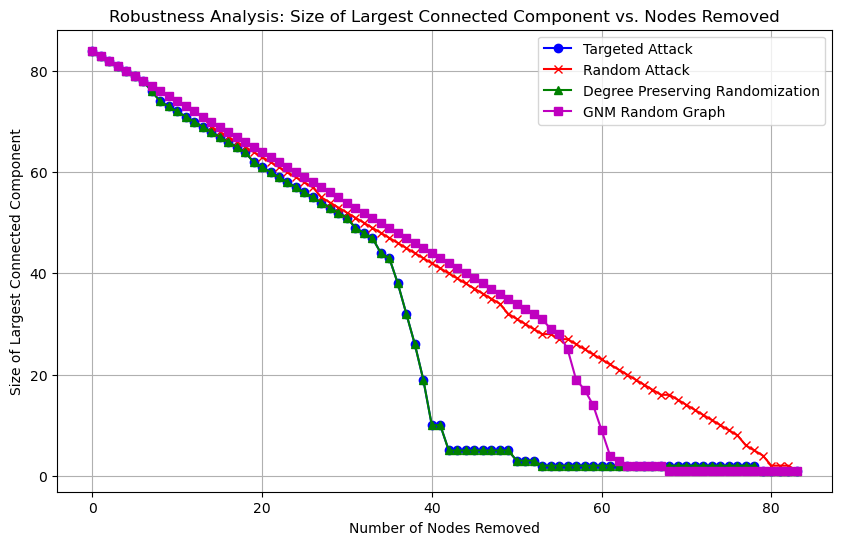

In [30]:
def degree_preserving_randomization_robustness(G):
    G_pre = G.copy()
    G_preserving = nx.double_edge_swap(G_pre, nswap=1, max_tries=100)
    Gc_pre, _ = degree_robust_remove(G_preserving)
    return Gc_pre

# Execute degree robustness analysis
Gc_d, removed = degree_robust_remove(G)
print("Degree robustness (size of largest connected component after each removal):", Gc_d)
print("Nodes removed in order:", removed)

# Execute random robustness analysis
Gc_dr = degree_robust_rand(G)
print("Random removal robustness (size of largest connected component after each removal):", Gc_dr)

# Execute degree preserving randomization robustness analysis
Gc_pre = degree_preserving_randomization_robustness(G)
print("Degree preserving randomization robustness (size of largest connected component after each removal):", Gc_pre)

# Generating GNM random graph and robustness analysis
G_gnm = nx.gnm_random_graph(len(G), G.number_of_edges(), seed=23, directed=False)
averagedegree_gnm = G_gnm.size() * 2 / len(G_gnm)
print("Average degree of GNM:", averagedegree_gnm)
Gc_gnm_d, _ = degree_robust_remove(G_gnm)

# Plot the robustness analysis for targeted attacks
plt.figure(figsize=(10, 6))
plt.plot(Gc_d, marker='o', linestyle='-', color='b', label='Targeted Attack')
plt.plot(Gc_dr, marker='x', linestyle='-', color='r', label='Random Attack')
plt.plot(Gc_pre, marker='^', linestyle='-', color='g', label='Degree Preserving Randomization')
plt.plot(Gc_gnm_d, marker='s', linestyle='-', color='m', label='GNM Random Graph')
plt.xlabel('Number of Nodes Removed')
plt.ylabel('Size of Largest Connected Component')
plt.title('Robustness Analysis: Size of Largest Connected Component vs. Nodes Removed')
plt.legend()
plt.grid(True)
plt.show()

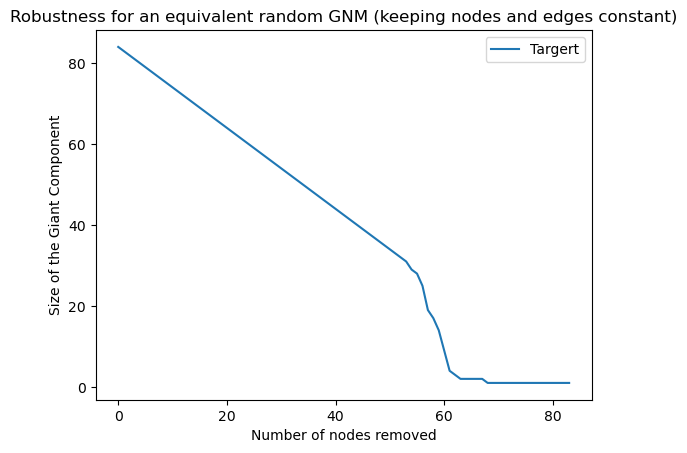

In [31]:
#ploting the robustness graph for targeted  and random attack based on degree
#plt.plot(Gc_gnm_d, label="Actual") 
plt.plot(Gc_gnm_d, label="Targert") 
plt.xlabel("Number of nodes removed") 
plt.ylabel("Size of the Giant Component")
plt.title("Robustness for an equivalent random GNM (keeping nodes and edges constant)") 
plt.legend()

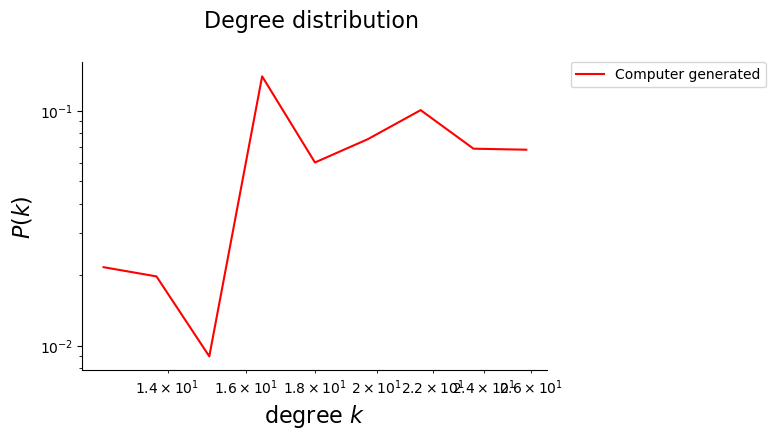

In [33]:
# Plotting degree distribution of GNM model

degrees_rand = [d for n, d in G_gnm.degree()]
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)

fig2 = plt.figure(figsize=(6, 4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1]) / 2)
plt.loglog(x1, density_rand, 'r', label='Computer generated')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n', fontsize=16)
plt.show()


In [34]:
degrees_rand= list(G_gnm.degree().values())
kmin = min(degrees_rand)
kmax = max(degrees_rand)
bin_edges = np.linspace(kmin,kmax, num=50)
density_rand, bins = np.histogram(degrees_rand, bins=bin_edges, density=True)
fig2 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x1, density_rand, 'r--', label='Computer generated') 
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Degree distribution \n',fontsize=16)
plt.show()


#degree_airport_gnm

AttributeError: 'DegreeView' object has no attribute 'values'

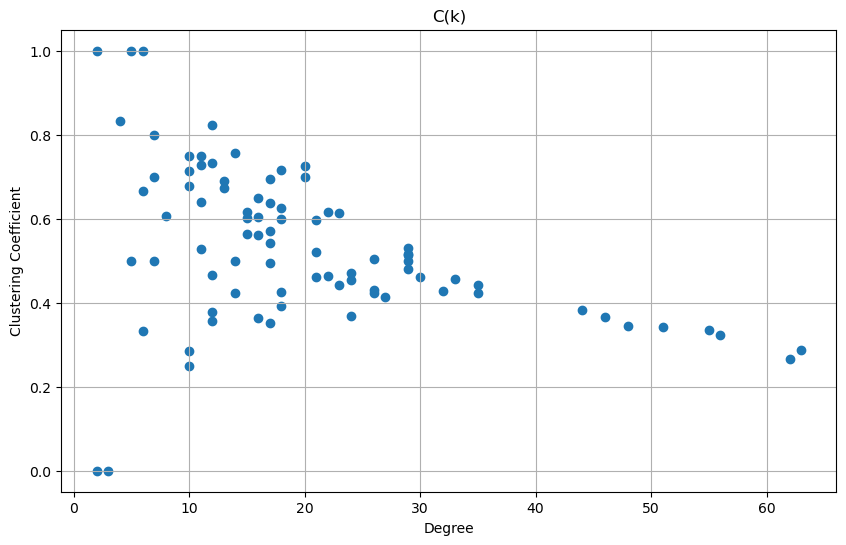

In [36]:
# Calculating clustering distribution
P = G.copy()
cls = []
deg_cl = []

for node in P.nodes():
    a = nx.clustering(P, nodes=node, weight=None)
    cls.append(a)
    d = P.degree(node)
    deg_cl.append(d)

plt.figure(figsize=(10, 6))
plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k)")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'C(k) - Random GNM model')

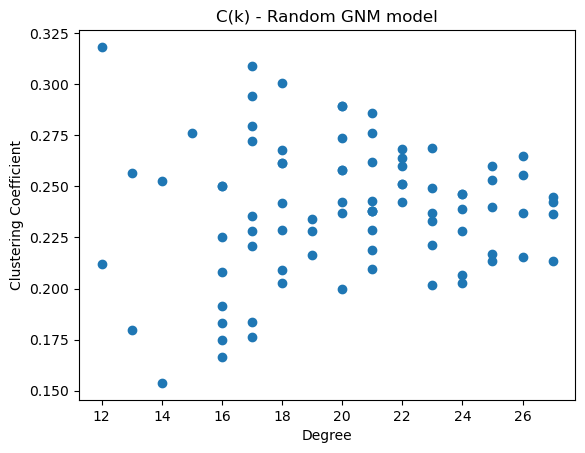

In [37]:
#calculating clustering distribution of random graph
Crand=G_gnm.copy()
cls=[]
deg_cl=[]

for i in range(0,len(Crand)):
    a=nx.clustering(Crand,nodes= i,weight=None)
    cls.append(a)
    d=Crand.degree(i)
    deg_cl.append(d)

plt.scatter(deg_cl, cls)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k) - Random GNM model") 
#plt.legend()

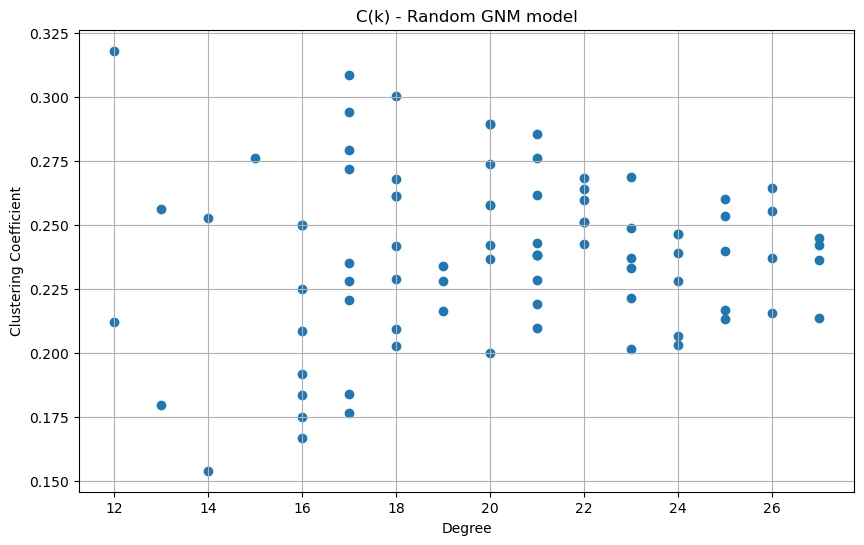

In [38]:
# Calculating clustering distribution of random graph
Crand = G_gnm.copy()
cls_rand = []
deg_cl_rand = []

for node in Crand.nodes():
    a = nx.clustering(Crand, nodes=node, weight=None)
    cls_rand.append(a)
    d = Crand.degree(node)
    deg_cl_rand.append(d)

plt.figure(figsize=(10, 6))
plt.scatter(deg_cl_rand, cls_rand)
plt.xlabel("Degree") 
plt.ylabel("Clustering Coefficient")
plt.title("C(k) - Random GNM model")
plt.grid(True)
plt.show()


#making the refined Graph
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)

In [40]:
#making the refined Graph 
remove_nodes = genfromtxt('cn_remove_nodes.csv', delimiter=',',dtype=str)
rem_nodes=remove_nodes[1:]

FileNotFoundError: cn_remove_nodes.csv not found.

In [42]:
Ref_G=G.copy()
Ref_G.remove_nodes_from(remove_nodes)
print (len(Ref_G))    
Ref_G.size()

NameError: name 'remove_nodes' is not defined

In [43]:
nx.write_edgelist(Ref_G, "edgelist2.txt", data=['weight'])

In [44]:
#[G.degree(node) for node in nodes]

In [45]:
#Weight distribution
weight_new = [int(x) for x in weight]

#copying in the same code
degrees1 = list(weight_new)
kmin = min(degrees1)
kmax = max(degrees1)
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
density1, bins = np.histogram(degrees1, bins=bin_edges, density=True)
fig1 = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x1 = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x1, density1, 'r--', label='Actual') 
plt.xlabel(r"weight $k$", fontsize=16)
plt.ylabel(r"$P(w)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
#fit1.power_law.plot_pdf(ax=ax, label='Power law fit',color='r', marker='+')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Weight distribution \n',fontsize=16)
plt.show()

NameError: name 'weight' is not defined